In [40]:
import pandas as pd
import numpy as np


In [41]:
df=pd.read_csv("fake_news_dataset.csv")
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [42]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [44]:
df.shape

(20800, 5)

In [45]:
df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [46]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,20800.0,NaN,NaN,NaN,10399.5,6004.587135,0.0,5199.75,10399.5,15599.25,20799.0
title,20242,19803,Get Ready For Civil Unrest: Survey Finds That ...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
author,18843,4201,Pam Key,243,NaN,NaN,NaN,NaN,NaN,NaN,NaN
text,20761,20386,,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
label,20800.0,NaN,NaN,NaN,0.500625,0.500012,0.0,0.0,1.0,1.0,1.0


In [47]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [48]:
df.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
20795    False
20796    False
20797    False
20798    False
20799    False
Length: 20800, dtype: bool

In [49]:
df=df.dropna()   # handling missing value by droping those row

In [50]:
df.isna().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [51]:
df.shape


(18285, 5)

In [52]:
df['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [53]:
!pip install nltk

In [54]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [55]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
import re # regular expression

In [56]:
stop_words=stopwords.words('english')

In [57]:
df.reset_index(inplace=True)

In [58]:
df.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [59]:
df['title']=df['title'].fillna(' ')
df['title']=df['title'].apply(lambda x:str(x))

C:\Users\admin\AppData\Local\Temp\ipykernel_9648\2072230803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title']=df['title'].fillna(' ')
C:\Users\admin\AppData\Local\Temp\ipykernel_9648\2072230803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title']=df['title'].apply(lambda x:str(x))


In [60]:
df['title']=df['title'].astype(str)

C:\Users\admin\AppData\Local\Temp\ipykernel_9648\697274295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title']=df['title'].astype(str)


In [61]:
x=df['title'].values
x

array(['House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It',
       'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart',
       'Why the Truth Might Get You Fired', ...,
       'Macy’s Is Said to Receive Takeover Approach by Hudson’s Bay - The New York Times',
       'NATO, Russia To Hold Parallel Exercises In Balkans',
       'What Keeps the F-35 Alive'], shape=(18285,), dtype=object)

In [62]:
y=df['label'].values
y


array([1, 0, 1, ..., 0, 1, 1], shape=(18285,))

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [64]:
x_train.shape,y_train.shape

((14628,), (14628,))

In [65]:
x_test.shape,y_test.shape

((3657,), (3657,))

In [66]:
tfidf=TfidfVectorizer()
x_train_tf=tfidf.fit_transform(x_train)
x_test_tf=tfidf.transform(x_test)

In [67]:
model=LogisticRegression()
model.fit(x_train_tf,y_train)
prediction=model.predict(x_test_tf)



In [68]:
print("accuracy:",accuracy_score(y_test,prediction))
cm=confusion_matrix(y_test,prediction)
print("confusion_matrix:",cm)
print("class_rpt:",print(classification_report(y_test,prediction)))

accuracy: 0.9163248564397046
confusion_matrix: [[1810  272]
 [  34 1541]]
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      2082
           1       0.85      0.98      0.91      1575

    accuracy                           0.92      3657
   macro avg       0.92      0.92      0.92      3657
weighted avg       0.92      0.92      0.92      3657

class_rpt: None


In [69]:
import matplotlib.pyplot as plt

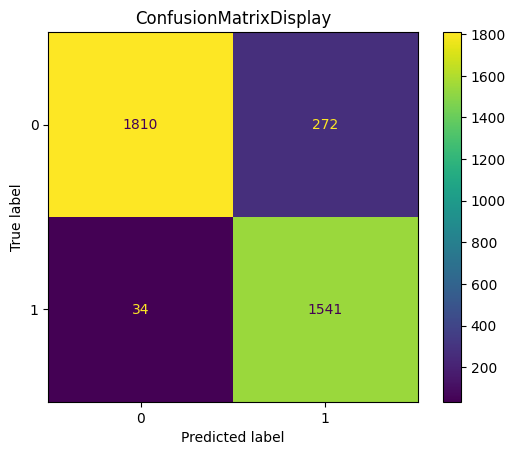

In [70]:
display=ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.title('ConfusionMatrixDisplay')
plt.show()

In [71]:
def predict_news(news_text):
    news_vector=tfidf.transform([news_text])
    prediction=model.predict(news_vector)

    if prediction[0]==1:
        return "***REAL NEWS***"
    else:
        return "FAKE NEWS"
        

In [72]:
news_text="15 Civilians Killed In Single US Airstrike Have Been Identified"
print(predict_news(news_text))


***REAL NEWS***


In [ ]:
!pip install streamlit



In [76]:
import pickle
pickle.dump(model, open("fake_news_model.pkl", "wb"))
pickle.dump(tfidf, open("tfidf.pkl", "wb"))



In [86]:
!python -m pip install tensorflow==2.15.0


^C


In [87]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq  = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=300)
X_test_pad  = pad_sequences(X_test_seq, maxlen=300)

NameError: name 'Tokenizer' is not defined

In [ ]:
model_dl = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=300),
    LSTM(128, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_dl.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model_dl.summary()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


In [ ]:
 model_dl.fit(
    X_train_pad,
    y_train,
    epochs=5,
    batch_size=64,
    validation_data=(X_test_pad, y_test)
)

In [ ]:
def predict_news_dl(text):
    seq = tokenizer.texts_to_sequences([text])
    pad = pad_sequences(seq, maxlen=300)
    pred = model_dl.predict(pad)

    if pred[0][0] > 0.5:
        return "REAL NEWS 🟢"
    else:
        return "FAKE NEWS 🔴"

ERROR: Could not find a version that satisfies the requirement tensorflow==2.15.0 (from versions: none)
ERROR: No matching distribution found for tensorflow==2.15.0
